In [1]:
import xarray as xr

Files follow the pattern: `{Zone}_{Scenario}_{Weather_Model}_{Year}.csv`

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

def load_e3_load_forecast_data(zone, scenario, weather_model, year,
                               return_cols=["total_load"]):
    filename = f"../data/e3_load/{zone}_{scenario}_{weather_model}_{year}.csv"
    # Read CSV into pandas first
    df = pd.read_csv(filename)
    # set the time index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # rename the 'timestamp' column to 'time' for xarray compatibility
    df.rename(columns={'timestamp': 'time'}, inplace=True)

    df.set_index('time', inplace=True)

    # creat a new column for the total load
    df['total_load'] = df.sum(axis=1)

    df_return = df[return_cols]

    # Convert to xarray dataset
    ds = df_return.to_xarray()
    return ds


In [53]:
zone="WECC_SW"
scenario="high_climate_action"
weather_model="WRF_TAIESM1"
year="2025"
filename = f"../data/e3_load/{zone}_{scenario}_{weather_model}_{year}.csv"
# Read CSV into pandas first
df = pd.read_csv(filename)
# set the time index
df['timestamp'] = pd.to_datetime(df['timestamp'])
    # rename the 'timestamp' column to 'time' for xarray compatibility
df.rename(columns={'timestamp': 'time'}, inplace=True)

df.set_index('time', inplace=True)

In [59]:
ds_ref_2025 = load_e3_load_forecast_data("WECC_SW","reference","WRF_TAIESM1","2025")
ds_ref_2045 = load_e3_load_forecast_data("WECC_SW","reference","WRF_TAIESM1","2045")

ds_act_2025 = load_e3_load_forecast_data("WECC_SW","high_climate_action","WRF_TAIESM1","2025")
ds_act_2045 = load_e3_load_forecast_data("WECC_SW","high_climate_action","WRF_TAIESM1","2045")

In [60]:
ds_ref_2025

<xarray.Dataset> Size: 5MB
Dimensions:     (time: 315576)
Coordinates:
  * time        (time) datetime64[ns] 3MB 2025-01-01 ... 2060-12-31T23:00:00
Data variables:
    total_load  (time) float64 3MB 13.68 14.54 14.97 15.71 ... 14.77 14.3 14.47

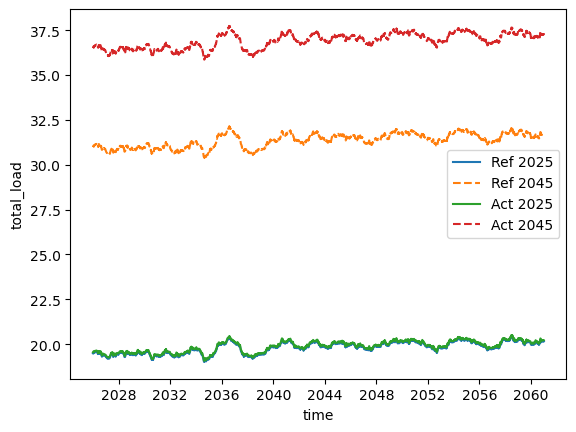

In [51]:
ds_ref_2025['total_load'].rolling(time=8760).mean().plot(label='Ref 2025')
ds_ref_2045['total_load'].rolling(time=8760).mean().plot(label='Ref 2045', linestyle='--')

ds_act_2025['total_load'].rolling(time=8760).mean().plot(label='Act 2025')
ds_act_2045['total_load'].rolling(time=8760).mean().plot(label='Act 2045', linestyle='--')

plt.legend()